# Pandas, Jupyter and Matplotlib

First let's import pandas and matplotlib

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

I will work on the following database
https://data.gov.il/dataset/jobmarketpulse/resource/50a32c08-be13-4c73-a067-58c47dc41776

In [3]:
unemployment_data = pd.read_csv("unemployment_data.csv")

In [4]:
unemployment_data.head()

,End date,Quarter,Year,Month,Original data,Unemployers who stand up at the office (seasonally adjusted),Trend,One month ahead forecast- seasonally adjusted data,Next month graph's forecast,Forecast graph
0,31/01/2008,1,2008,January,"186,654","185,375","186,264",NaN,NaN,NaN
1,29/02/2008,1,2008,February,"184,230","185,533","183,116",NaN,NaN,NaN
2,31/03/2008,1,2008,March,"185,798","182,888","180,784",NaN,NaN,NaN
3,30/04/2008,2,2008,April,"138,172","180,091","180,091",NaN,NaN,NaN
4,31/05/2008,2,2008,May,"178,724","181,576","181,386",NaN,NaN,NaN


Let's create a line chart that will visiuzlize unemployed per quarter

In [5]:
unemployment_data.describe()

,Quarter,Year
count,143.000000,143.000000
mean,2.489510,2013.461538
std,1.118772,3.445285
min,1.000000,2008.000000
25%,1.500000,2010.500000
50%,2.000000,2013.000000
75%,3.000000,2016.000000
max,4.000000,2019.000000


Let start the cleanup process

In [6]:
 unemployment_data["Original data"] 

KeyError: 'Original data'

In [7]:
for column_name in unemployment_data:
    print("'"+column_name+"'")

'End date'
'Quarter'
'Year'
'Month'
' Original data '
' Unemployers who stand up at the office (seasonally adjusted) '
' Trend '
' One month ahead forecast- seasonally adjusted data '
' Next month graph's forecast '
'Forecast graph'


In [8]:
unemployment_data[" Original data "] 

0        186,654
1        184,230
2        185,798
3        138,172
4        178,724
         ...    
138     175,583 
139     172,491 
140     168,820 
141     156,280 
142          NaN
Name:  Original data , Length: 143, dtype: object

In [9]:
columns_to_keep = [unemployment_data["Quarter"],unemployment_data["Year"],unemployment_data[" Original data "]]
headers = ["Quarter", "Year",'Unemployed']

In [10]:
unemployment_data =  pd.concat(columns_to_keep, axis=1, keys=headers)
unemployment_data.head()

,Quarter,Year,Unemployed
0,1,2008,"186,654"
1,1,2008,"184,230"
2,1,2008,"185,798"
3,2,2008,"138,172"
4,2,2008,"178,724"


In [11]:
unemployment_data['date'] = unemployment_data['Year'].astype('str') + "_" + unemployment_data['Quarter'].astype('str')
unemployment_data



,Quarter,Year,Unemployed,date
0,1,2008,"186,654",2008_1
1,1,2008,"184,230",2008_1
2,1,2008,"185,798",2008_1
3,2,2008,"138,172",2008_2
4,2,2008,"178,724",2008_2
...,...,...,...,...
138,3,2019,"175,583",2019_3
139,3,2019,"172,491",2019_3
140,3,2019,"168,820",2019_3
141,4,2019,"156,280",2019_4


In [12]:
chart_data = unemployment_data.groupby("date").sum()
chart_data

,Quarter,Year
date,,
2008_1,3,6024
2008_2,6,6024
2008_3,9,6024
2008_4,12,6024
2009_1,3,6027
2009_2,6,6027
2009_3,9,6027
2009_4,12,6027
2010_1,3,6030


In [15]:
unemployment_data['Unemployed'] = unemployment_data['Unemployed'].astype(str).str.replace(',','').astype(float)


In [17]:
chart_data = unemployment_data.groupby("date").sum()
chart_data

,Quarter,Year,Unemployed
date,,,
2008_1,3,6024,556682.0
2008_2,6,6024,515992.0
2008_3,9,6024,608902.0
2008_4,12,6024,588521.0
2009_1,3,6027,661429.0
2009_2,6,6027,698733.0
2009_3,9,6027,711414.0
2009_4,12,6027,660821.0
2010_1,3,6030,618525.0


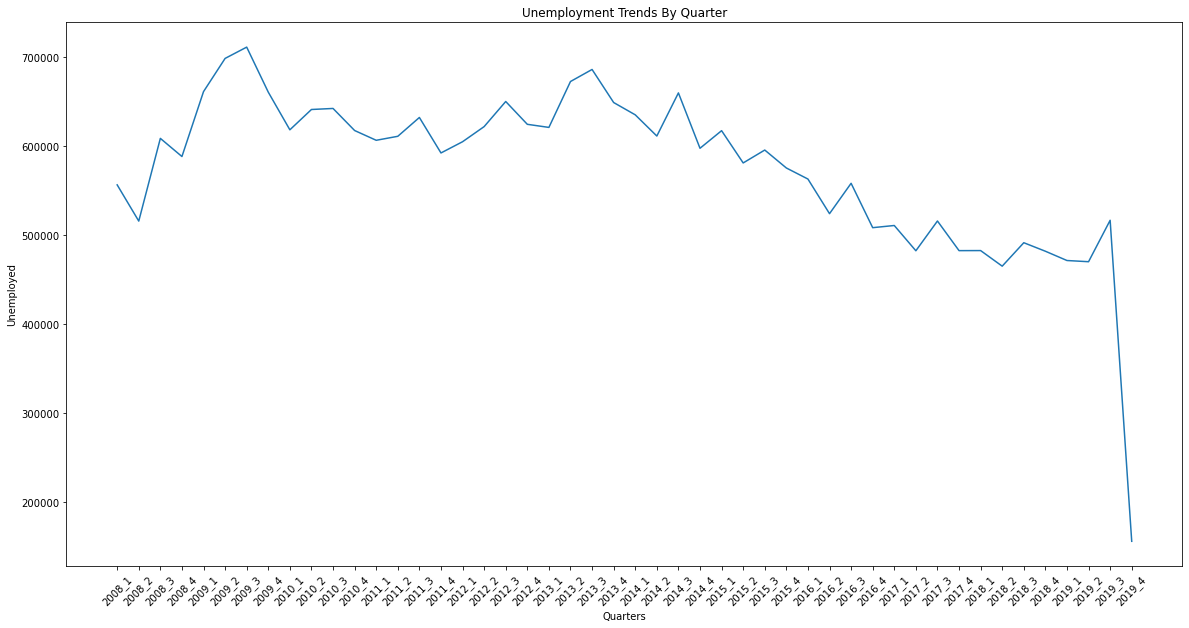

In [19]:
plt.figure(figsize=(20,10))
plt.plot(chart_data.index,chart_data['Unemployed'])
plt.title("Unemployment Trends By Quarter")
plt.xlabel("Quarters")
plt.xticks(rotation=45)
plt.ylabel("Unemployed")
#plt.show()
plt.savefig("unemployment_trend.jpg")